## COVID-19 challenge

>COVID-19 testing data for trend analysis and policy-making.
>
>TODO: for more information read [dataset page](https://www.kaggle.com/datasets/expertjha001/corona-tested-dataset)

## Importing Libraries

In [38]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from decision_tree import MultiNodeCategoricalDecisionTree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

## Loading the Dataset

TODO: Replace this section with code to load your actual dataset.

In this section, you should:
1. Load your dataset from a file (CSV, Excel, etc.) or a database
2. Display basic information about the dataset (shape, columns, etc.)
3. Show the first few rows of the data

In [39]:
# TODO: Load the actual dataset
def load_dataset():
    return pd.read_csv("corona_tested.csv")
    # This is a placeholder. Replace with actual data loading code.
#    data = pd.DataFrame({
#       'feature1': ['A', 'B', 'C', 'A', 'B'] * 20,
#        'feature2': ['X', 'Y', 'Z', 'X', 'Y'] * 20,
#        'feature3': ['P', 'Q', 'R', 'P', 'Q'] * 20,
#        'target': [0, 1, 0, 1, 0] * 20
#    })
#    return data
df = load_dataset()
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11928\4125654796.py:3: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("corona_tested.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


## Exploratory Data Analysis (EDA)

TODO: Perform exploratory data analysis on your dataset.

In this section, you should:
1. Analyze the distribution of features and target variable
2. Check for missing values and outliers
3. Visualize relationships between features and the target variable
4. Identify any patterns or correlations in the data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11928\4155198051.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


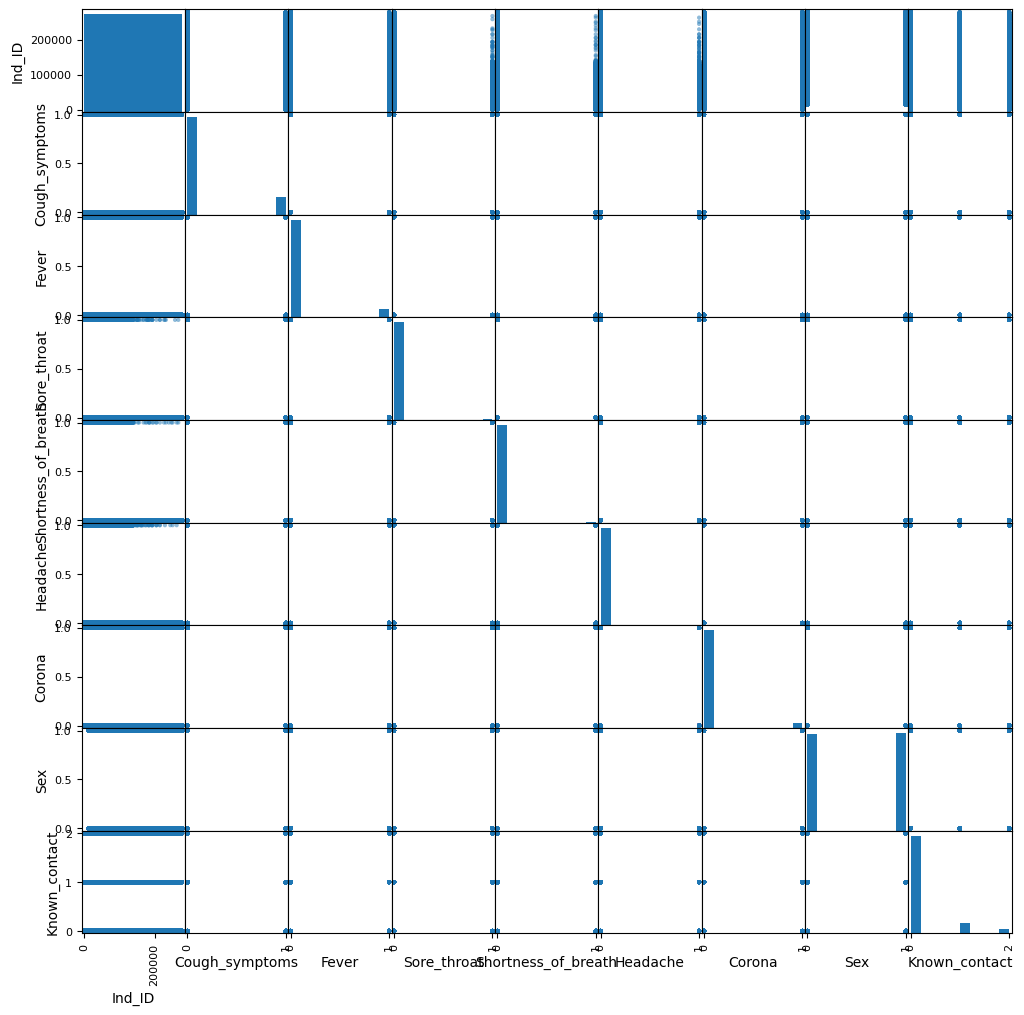

In [40]:
# Add visualizations using matplotlib or seaborn
from pandas.plotting import scatter_matrix
map_01 = {
    "negative":0,
    "positive":1,
    #"other":2,
}
map_02 = {
    "Other":0,
    "Abroad":1,
    "Contact with confirmed":2,
    
}
map_03 = {
    "male":0,
    "female":1,    
}


df = df.replace({True: 1, False: 0})
df["Corona"] = df["Corona"].map(map_01)
df["Known_contact"] = df["Known_contact"].map(map_02)
df["Sex"] = df["Sex"].map(map_03)


import matplotlib.pyplot as plt
matrix = scatter_matrix(df,figsize=(12,12))

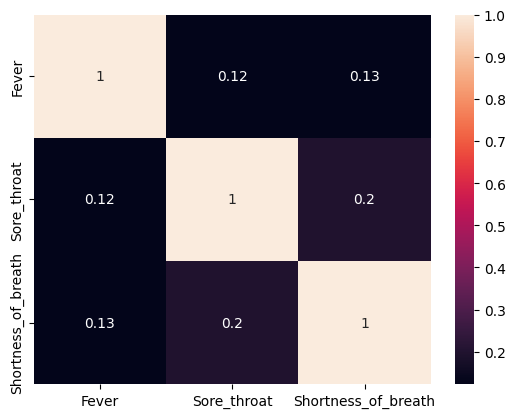

In [41]:
import seaborn as sns
ax = sns.heatmap(df.iloc[:,3:6].corr(), annot=True)
# data does not have correlation to eacht other

# TODO: Add your EDA code here

In [42]:
df.describe()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
count,278848.000000,278596.000000,278596.000000,278847.000000,278847.000000,278847.000000,274956.000000,259285.000000,278848.00000
mean,139424.500000,0.151574,0.078077,0.006907,0.005655,0.008657,0.053569,0.501988,0.16764
std,80496.628269,0.358608,0.268294,0.082821,0.074990,0.092640,0.225165,0.499997,0.46459
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,69712.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,139424.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,209136.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
max,278848.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000


In [43]:
#df.replace({'None':np.nan},inplace=True)

In [44]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [45]:
df.value_counts()

Ind_ID  Test_date   Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  Corona  Age_60_above  Sex  Known_contact
13728   22-03-2020  1.0             0.0    0.0          0.0                  0.0       0.0     No            0.0  1                1
108078  06-04-2020  0.0             0.0    0.0          0.0                  0.0       0.0     No            0.0  0                1
108092  06-04-2020  0.0             0.0    0.0          0.0                  0.0       0.0     No            0.0  0                1
108091  06-04-2020  0.0             0.0    0.0          0.0                  0.0       0.0     No            1.0  0                1
108090  06-04-2020  0.0             0.0    0.0          0.0                  0.0       0.0     No            0.0  0                1
                                                                                                                                  ..
61052   31-03-2020  0.0             0.0    0.0          0.0               

## Preprocessing

TODO: Preprocess your data to prepare it for the decision tree model.

In this section, you should:
1. Handle missing values (if any)
2. Encode categorical variables
3. Split the data into features (X) and target (y)
4. Split the data into training and testing sets

Note: You should encode your data before splitting it into features and target, 
because the decision tree classifier works with categorical data.

Example of encoding data:


In [46]:
"""
TODO: Add your preprocessing code here
Note : you should encode your data before split it into features and target ,
because decision tree classifier just work with categorical data

example of encoding data :

le = LabelEncoder()
X = data.drop('target', axis=1)
y = data['target']

Encode categorical features
Features need to be encoded using OrdinalEncoder search about this function in sklearn library

"""

##Solution One
Z = df.drop(['Ind_ID', 'Test_date','Age_60_above'], axis=1).dropna()
Z = Z.astype('int64')
X = Z.drop("Corona",axis=1)
Y = Z['Corona']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

"""
# Split the data
X_train, X_test, y_train, y_test = # TODO : Split dataset using sklearn library ,naturally you should search about this function
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
"""


'\n# Split the data\nX_train, X_test, y_train, y_test = # TODO : Split dataset using sklearn library ,naturally you should search about this function\nprint("Training set shape:", X_train.shape)\nprint("Test set shape:", X_test.shape)\n'

## Training the Model

In [47]:
# Initialize and train the model
model = MultiNodeCategoricalDecisionTree(max_depth = 7,min_samples_split = 2,criterion='entropy').fit(X_train.values, y_train.values)
# TODO use cross-validation for training too
#model.fit(X_train, y_train)

## Evaluating the Model

In [48]:
# Make predictions
y_pred = model.predict(X_test)

# Ensure y_pred is in the same format as y_test
y_pred = np.array(y_pred).astype(int)
y_test = np.array(y_test).astype(int)

# Calculate accuracy and cross validation
accuracy = accuracy_score(y_pred, y_test) 

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1_score(y_pred, y_test, average='macro'):.4f}")

Accuracy: 0.9699
F1 Accuracy: 0.8321


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(
    model, X_train, y_train, cv=5, scoring='f1_macro')
scores

array([0.82192734, 0.83004002, 0.82742015, 0.82738761, 0.82891087])

## check with skleran learning Decision Tree

In [50]:
from sklearn import tree
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 4, min_samples_split = 10)
clf = clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, y_test)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1_score(y_test, predicted, average='weighted'):.4f}")

Accuracy: 0.9699
F1 Accuracy: 0.9680


## Feature Importances

In [51]:
# Display feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importances)

               feature  importance
4             Headache    0.142960
6        Known_contact    0.142960
1                Fever    0.142899
2          Sore_throat    0.142844
0       Cough_symptoms    0.142836
3  Shortness_of_breath    0.142760
5                  Sex    0.142740


## Puring

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03336218076236169


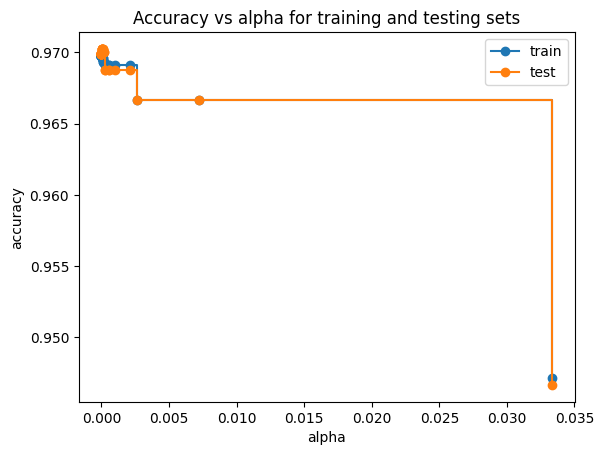

In [52]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

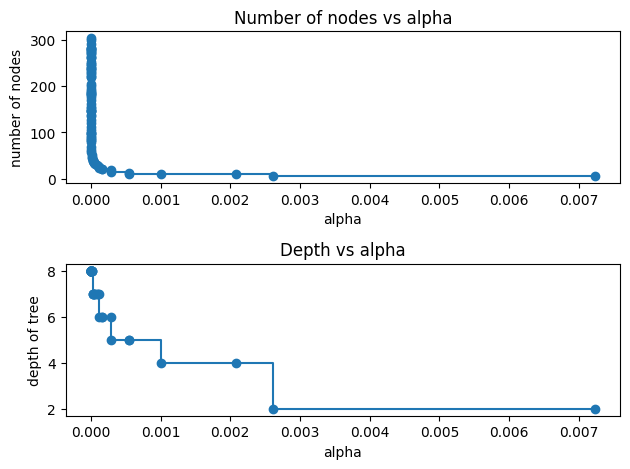

In [53]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

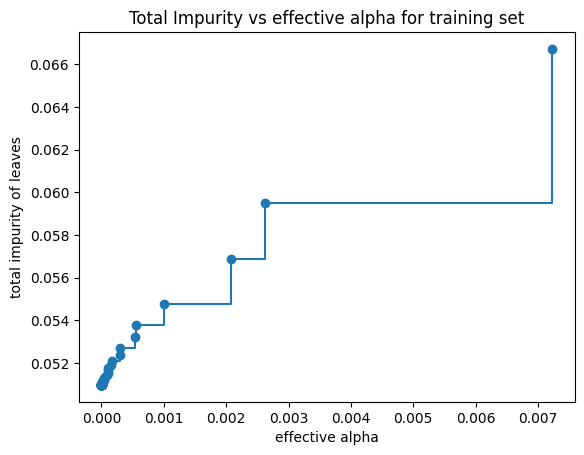

In [54]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [55]:
## I write with Chat GPT this code for learn more puring okkkkkkkkkkkkkkkkkkkkkk?
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate accuracy for each pruned model on the test set
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Find the best alpha that gives the highest test accuracy
best_index = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[best_index]
best_clf = clfs[best_index]

# Evaluate the best model
predicted = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f"Best alpha: {best_alpha:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1_score(y_test, predicted, average='weighted'):.4f}")


Best alpha: 0.0000
Accuracy: 0.9702
F1 Accuracy: 0.9675


## Preparing Submission

## Pro Plus 

In [56]:
# Boosting Baging
# در این روش مدل ها موازی و به صورت انتیتی ضعیف کنار هم درخت های تصمیم کوچک می سازند که جواب را به دست اورند
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)
preditt = model.predict(X_test)
accuracy = accuracy_score(y_test, preditt)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1_score(y_test, preditt, average='weighted'):.4f} ")

Accuracy: 0.9699
F1 Accuracy: 0.9680 


In [57]:
# Boosting AdaBoost
# در این روش مدل های پشت سرهم قرار می گیرند و ویک انتیتی ها درخت های تصمیمی می سازند که ورودی هر کدام خروجی دیگریست 
#روش کار اپدیت کردن وزن ها است و وزن هایی که درست پیش بینی کردن به همان صورت باقی ماند و اشتباهات با کمک تابع نمایی  سعی در بهتر کرن مدل می کند.
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1).fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1_score(y_test, predictions, average='weighted'):.4f} ")

Accuracy: 0.9637
F1 Accuracy: 0.9612 


c:\Users\Lenovo\OneDrive\Desktop\Rayan\qenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [58]:
# Boosting Gradient Boostin
#درخت تصمیم کامل پشت هم که هر دفعه ورودیش خروجی قبلیست که منهای تخمین  و لیلبل است.
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth=2, n_estimators=3).fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1_score(y_test, predictions, average='weighted'):.4f} ")

Accuracy: 0.9467
F1 Accuracy: 0.9207 
